In [348]:
import pandas as pd
from matplotlib import pyplot as plt
from numpy import NaN
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set

from pylab import rcParams
rcParams['figure.figsize'] = 25,20

## Reading and Printing Imported Data

In [349]:
data = pd.read_csv('https://raw.githubusercontent.com/joChazaro/xternworkassessment/main/2020-XTern-DS_V2.csv')
data.head()

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time_Min
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",$20.00,$50.00,3.5,12,4,30
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",$10.00,$50.00,3.5,11,4,30
2,ID_1595,39.253436,-85.123779,"Italian, Street Food, Fast Food",$15.00,$50.00,3.6,99,30,65
3,ID_5929,39.029841,-85.332050,"Mughlai, North Indian, Chinese",$25.00,$99.00,3.7,176,95,30
4,ID_6123,39.882284,-85.517407,"Cafe, Beverages",$20.00,$99.00,3.2,521,235,65


## Wrangling and Cleaning Data

In [350]:
data.shape

(2019, 10)

In [351]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2014    False
2015    False
2016    False
2017    False
2018    False
Length: 2019, dtype: bool

In [352]:
data[data.columns[4:6]] = data[data.columns[4:6]].replace('[\$,]', '', regex=True).astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019 entries, 0 to 2018
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant     2019 non-null   object 
 1   Latitude       2019 non-null   float64
 2   Longitude      2019 non-null   float64
 3   Cuisines       2019 non-null   object 
 4   Average_Cost   2019 non-null   float64
 5   Minimum_Order  2019 non-null   float64
 6   Rating         2019 non-null   object 
 7   Votes          2019 non-null   object 
 8   Reviews        2019 non-null   object 
 9   Cook_Time_Min  2019 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 157.9+ KB


In [353]:
data = data.applymap(lambda x: np.nan if x == "MISSING" else x)
data[data.columns[6]] = data[data.columns[6]].astype(float)
data[data.columns[7]] = data[data.columns[7]].astype(float)
data[data.columns[8]] = data[data.columns[8]].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019 entries, 0 to 2018
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant     2019 non-null   object 
 1   Latitude       2019 non-null   float64
 2   Longitude      2019 non-null   float64
 3   Cuisines       2019 non-null   object 
 4   Average_Cost   2019 non-null   float64
 5   Minimum_Order  2019 non-null   float64
 6   Rating         1666 non-null   float64
 7   Votes          1639 non-null   float64
 8   Reviews        1604 non-null   float64
 9   Cook_Time_Min  2019 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 157.9+ KB


In [354]:
data.head()

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time_Min
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",20.0,50.0,3.5,12.0,4.0,30
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",10.0,50.0,3.5,11.0,4.0,30
2,ID_1595,39.253436,-85.123779,"Italian, Street Food, Fast Food",15.0,50.0,3.6,99.0,30.0,65
3,ID_5929,39.029841,-85.332050,"Mughlai, North Indian, Chinese",25.0,99.0,3.7,176.0,95.0,30
4,ID_6123,39.882284,-85.517407,"Cafe, Beverages",20.0,99.0,3.2,521.0,235.0,65


### Checking Cleaned up data

In [355]:
data.head()

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time_Min
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",20.0,50.0,3.5,12.0,4.0,30
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",10.0,50.0,3.5,11.0,4.0,30
2,ID_1595,39.253436,-85.123779,"Italian, Street Food, Fast Food",15.0,50.0,3.6,99.0,30.0,65
3,ID_5929,39.029841,-85.332050,"Mughlai, North Indian, Chinese",25.0,99.0,3.7,176.0,95.0,30
4,ID_6123,39.882284,-85.517407,"Cafe, Beverages",20.0,99.0,3.2,521.0,235.0,65


## Investigate Data for Trends

#### Look over most used "Cuisine" keywords

In [356]:
data['Cuisines'].value_counts()

North Indian                       152
North Indian, Chinese              120
Fast Food                           83
South Indian                        60
Chinese                             40
                                  ... 
Mithai, Street Food, Chinese         1
Desserts, South Indian               1
Fast Food, Burger, Beverages         1
Continental, North Indian, Thai      1
Awadhi, Bihari                       1
Name: Cuisines, Length: 726, dtype: int64

#### Print a Pie Chart of the Top 10 Most Used Keywords (Most Popular Cuisine Types)

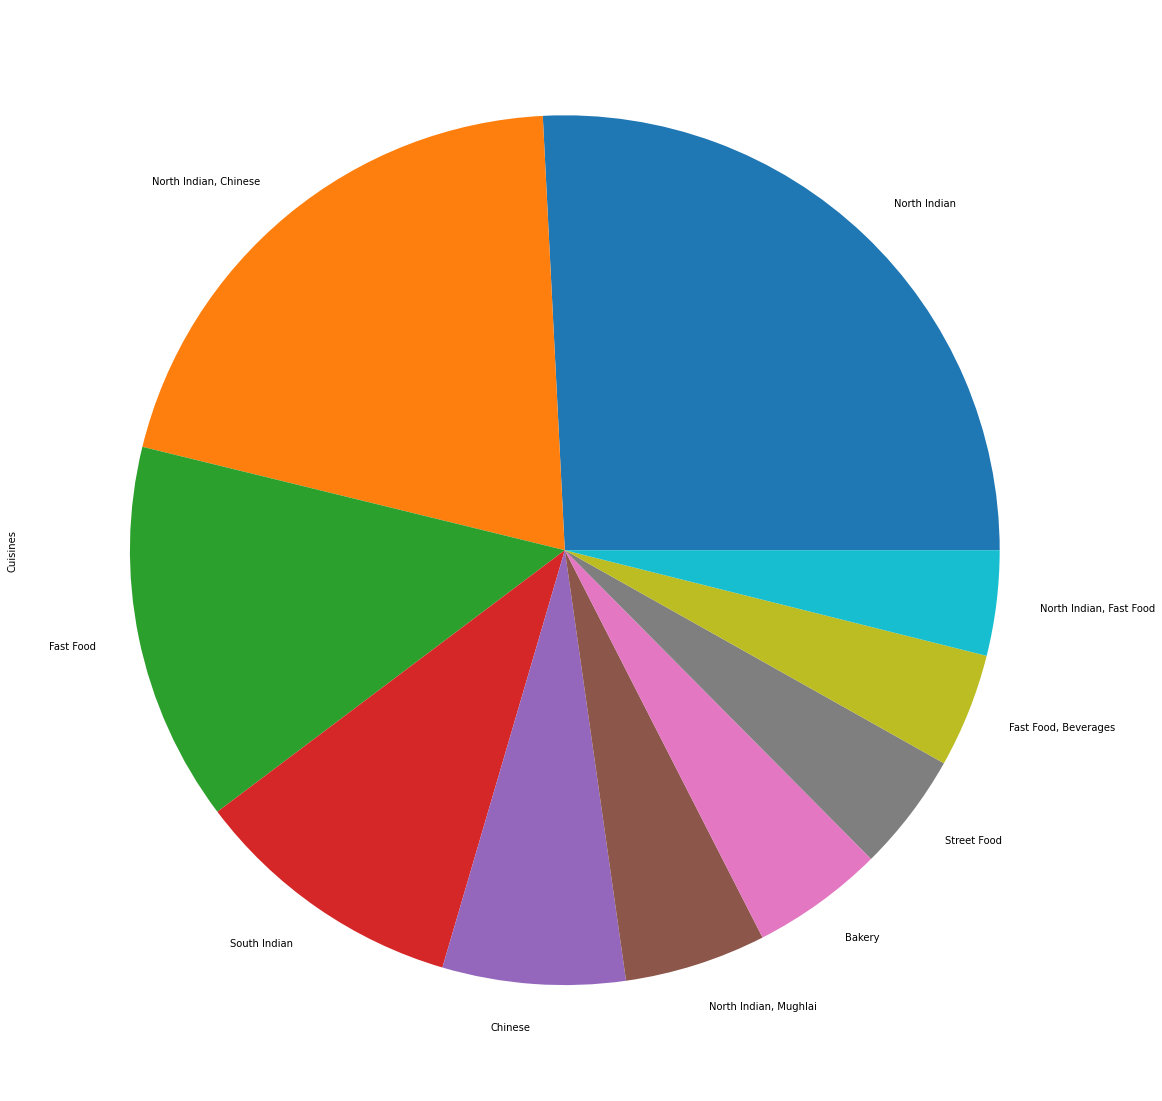

In [357]:
top10Cuisines =data['Cuisines'].value_counts()
top10Cuisines.sort_values(ascending=False)
top10Cuisines = top10[:10]
top10Cuisines.plot(kind="pie")

#### Print a graph of the Top 10 Highest Ratings

#### Findings 1)
##### A majority of the Top 10 Most Popular Restaurants are Indian (North and South), and Chinese and Fast Food Cuisine Restuarants. Depending on the invidual market of the restaurants, this may be because these are most succesful cuisines available for delivery.

#### Visual Representation of Restuarant Location from Provided Geographic Coordinates

In [358]:
coord = ['Restaurant','Latitude', 'Longitude']
restaurant_coord = data[coord]
restaurant_coord.head()

,Restaurant,Latitude,Longitude
0,ID_6321,39.262605,-85.837372
1,ID_2882,39.775933,-85.740581
2,ID_1595,39.253436,-85.123779
3,ID_5929,39.029841,-85.332050
4,ID_6123,39.882284,-85.517407


Text(0, 0.5, 'Latitude Coordinates')

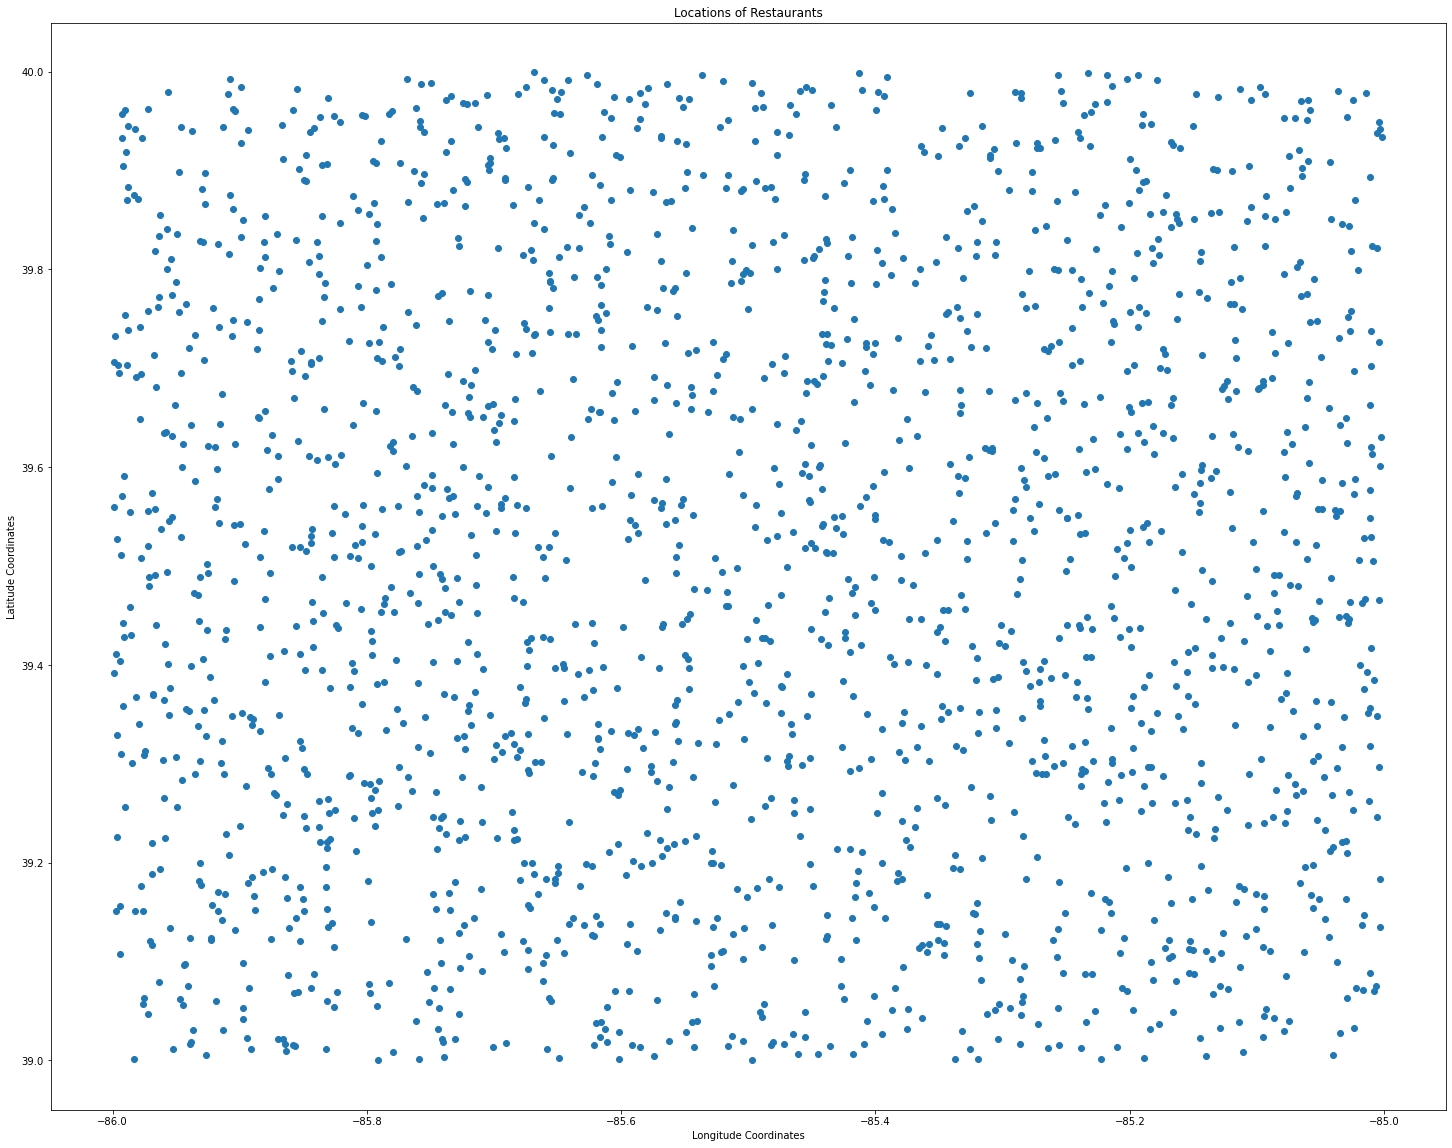

In [370]:
plt.scatter(x='Longitude', y='Latitude', data=data)
plt.title("Locations of Restaurants")
plt.xlabel("Longitude Coordinates")
plt.ylabel("Latitude Coordinates")

#### Findings 2)
##### The Scatter plot demonstrates the varied locations of the resteraunts which was determined by plotting the coordinates appropriately. This visualization may demonstrate the equal availability of the restaurants across the area. There is no "central" location where restaurants have a greater number of competitors or may be less accessible.

#### Graph Average Cost vs Ratings

Text(0.5, 1.0, 'Restaurant Rating vs Average Cost')

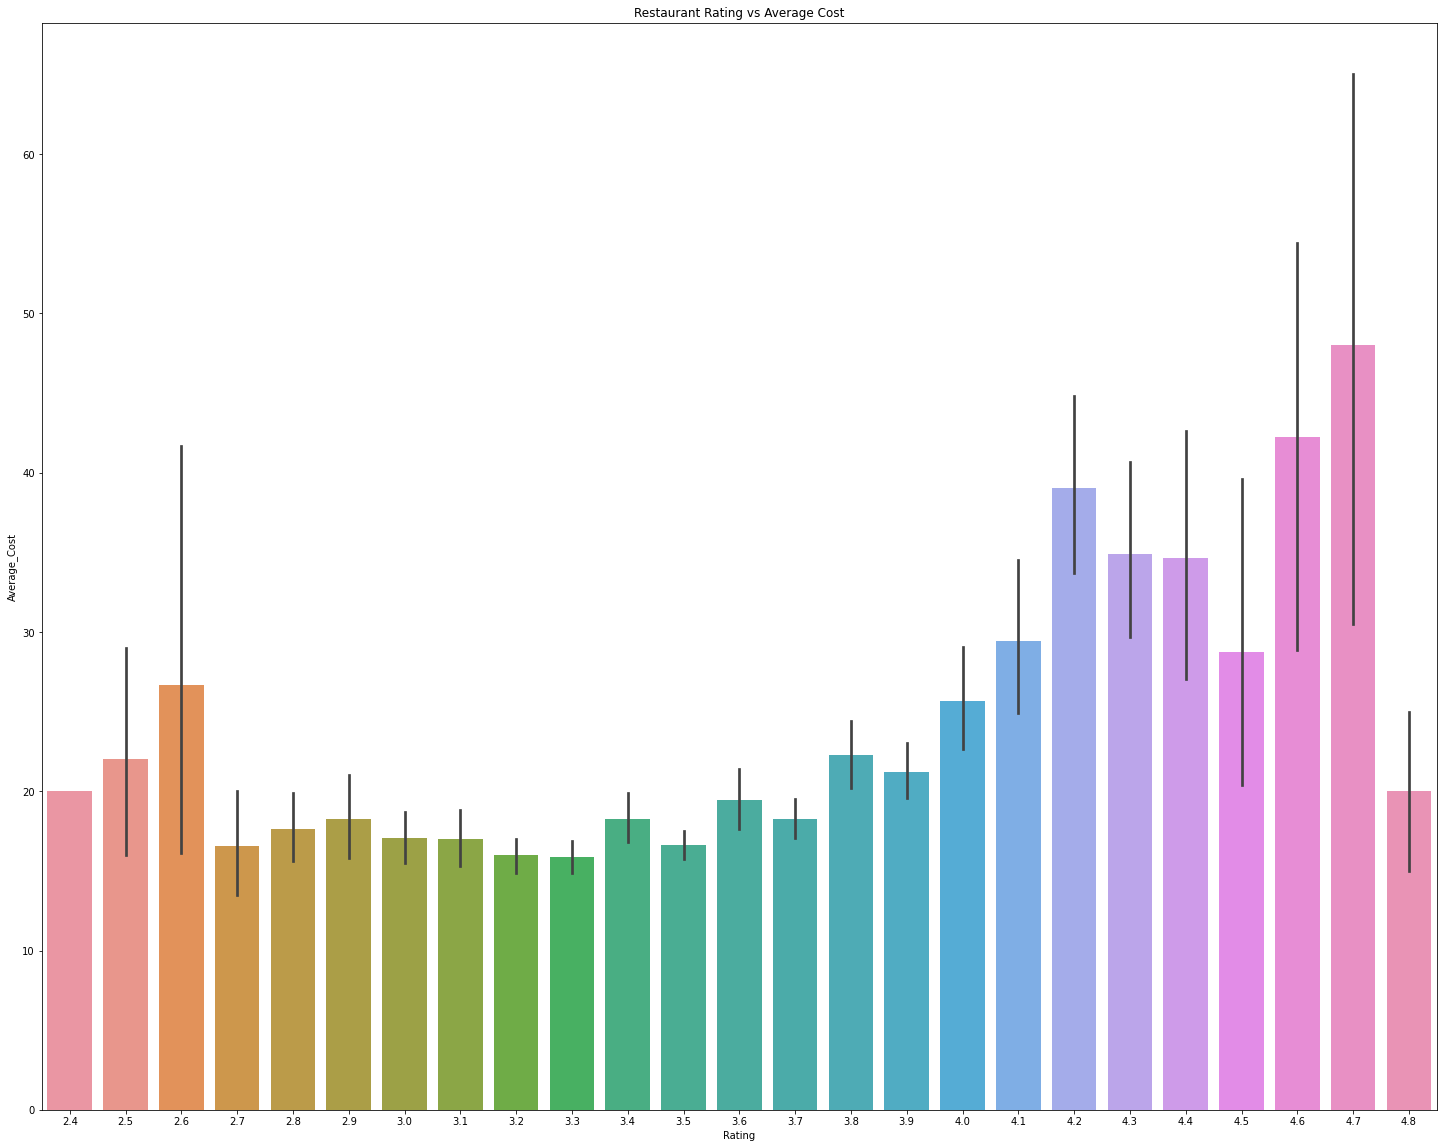

In [372]:
result = data.groupby(["Rating"])['Average_Cost'].aggregate(np.median).reset_index().sort_values('Rating')
sns.barplot(data=data, x = 'Rating', y='Average_Cost', order=result['Rating'])
plt.title("Restaurant Rating vs Average Cost")

#### Findings 3)
##### Typically it can be assumed that "higher quality" cuisines, typically determined by cost, will attract higher ratings. This plot however, demonstrates the opposite. From the graph, it is evident that the highest rated restaurant(s) have an Average Cost of about $ 40 to $ 50. However, the highest voted restaurants, on average cost about $ 20.

#### Analyze and Plot Cook Time vs Ratings

In [363]:
rating_to_cooktime = ['Restaurant','Rating', 'Cook_Time_Min']
restaurant_rct = data[rating_to_cooktime]
restaurant_rct.head()

,Restaurant,Rating,Cook_Time_Min
0,ID_6321,3.5,30
1,ID_2882,3.5,30
2,ID_1595,3.6,65
3,ID_5929,3.7,30
4,ID_6123,3.2,65


Text(0.5, 1.0, 'Restaurant Rating vs Cook Time (min)')

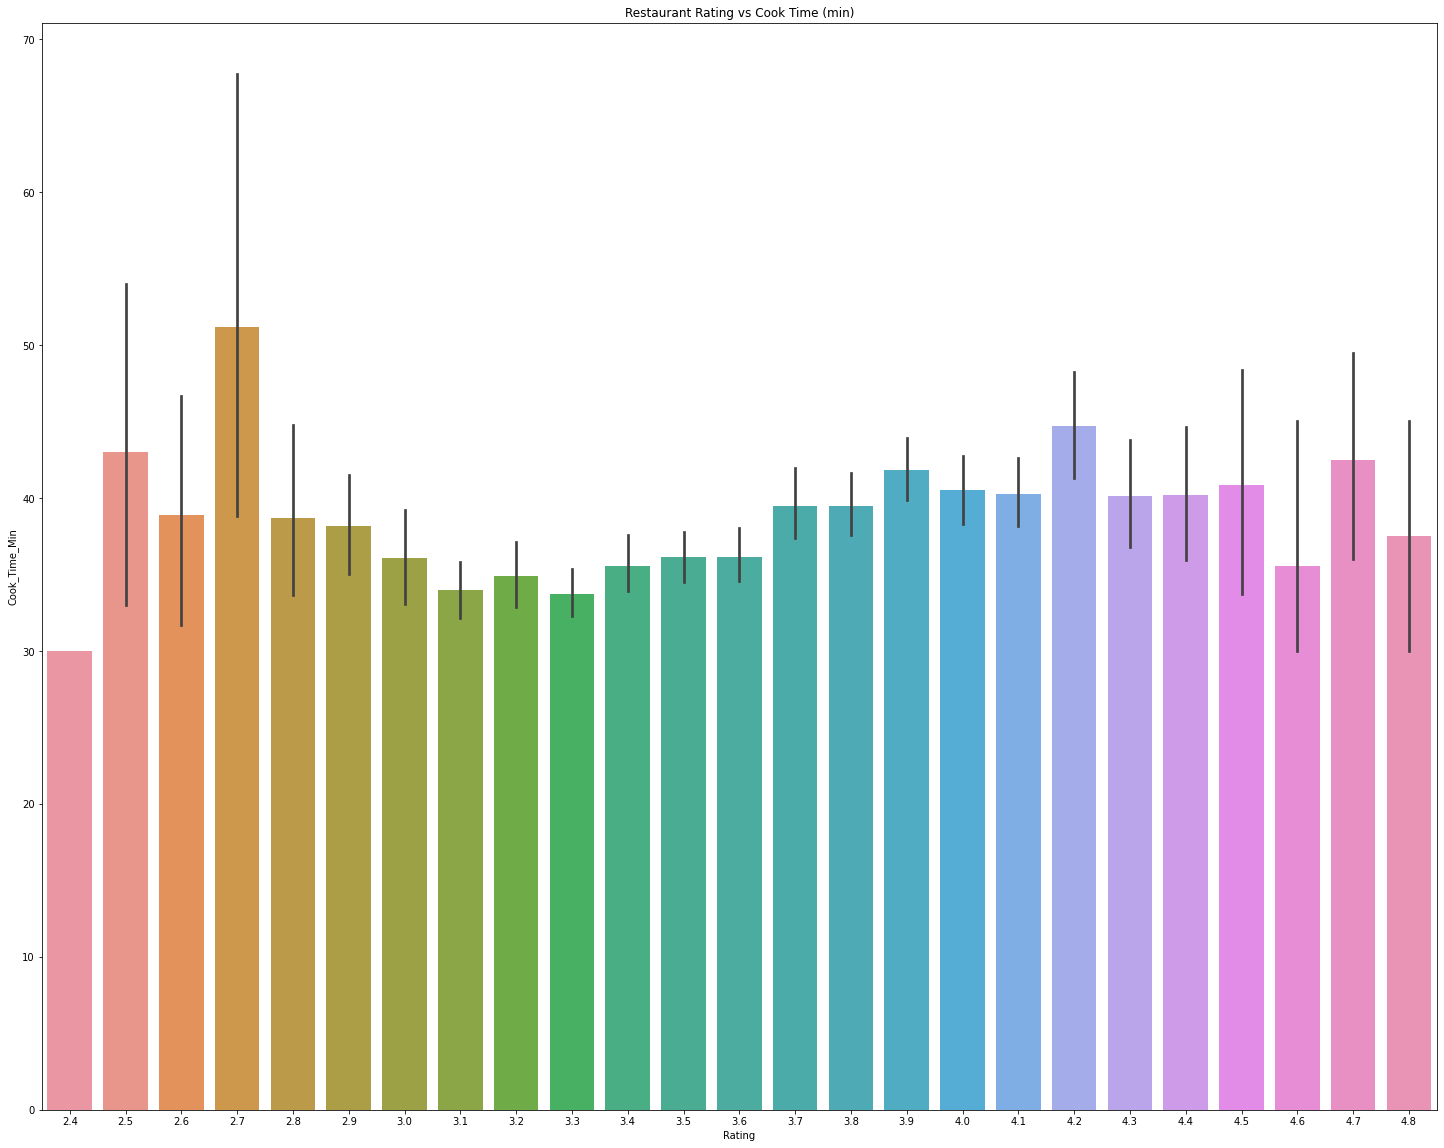

In [364]:
result = data.groupby(["Rating"])['Cook_Time_Min'].aggregate(np.median).reset_index().sort_values('Rating')
sns.barplot(data=data, x = 'Rating', y='Cook_Time_Min', order=result['Rating'])
plt.title("Restaurant Rating vs Cook Time (min)")

#### Findings 4)
##### It is important for restuarants to start considering the typical wait time for a customer's meal(s) to be delivered. By understanding the time spent on food preparation, restaurants may be able to realize where optimization may be needed.  For instance, although the fastest cook time restuarant also recieved the lowest rates, this goes to show that balance is in time management and product quality is crucial.

# Conclusion

##### Finding 1) A majority of the Top 10 Most Popular Restaurants are Indian (North and South), and Chinese and Fast Food Cuisine Restuarants. Depending on the invidual market of the restaurants, this may be because these are most succesful cuisines available for delivery.
##### Finding 2) The Scatter plot demonstrates the varied locations of the resteraunts which was determined by plotting the coordinates appropriately. This visualization may demonstrate the equal availability of the restaurants across the area. There is no "central" location where restaurants have a greater number of competitors or may be less accessible.
##### Finding 3) Typically it can be assumed that "higher quality" cuisines, typically determined by cost, will attract higher ratings. This plot however, demonstrates the opposite. From the graph, it is evident that the highest rated restaurant(s) have an Average Cost of about  40𝑡𝑜  50. However, the highest voted restaurants, on average cost about twenty dollars. 
##### Finding 4) It is important for restuarants to start considering the typical wait time for a customer's meal(s) to be delivered. By understanding the time spent on food preparation, restaurants may be able to realize where optimization may be needed. For instance, although the fastest cook time restuarant also recieved the lowest rates, this goes to show that balance is in time management and product quality is crucial.